In [1]:
from utils import load, dump
from evaluate import eval, load_trained
from os import getcwd
from tqdm import tqdm
import torch

/Users/shabo/Documents/Backtick/exjobb/venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
root = f'{getcwd()}/..'

In [3]:
data = load(f'{root}/data/prd_backtick-se_cowait_annotated.json')

def evaluate(checkpoint, path):
    
    predict, plot_progress = load_trained(checkpoint, path)
    plot_progress()
    
    y_true = []
    y_pred = []

    for pr in tqdm(data):
        title = pr['title']
        pcat = predict(title)
        tcat = pr['category']

        y_true.append(tcat)
        y_pred.append(pcat)
    
    eval(y_true, y_pred)

## Let's evaluate the BERTOverflow classifiers

### BERTOverflow finetuned on 40k balanced dataset, solid

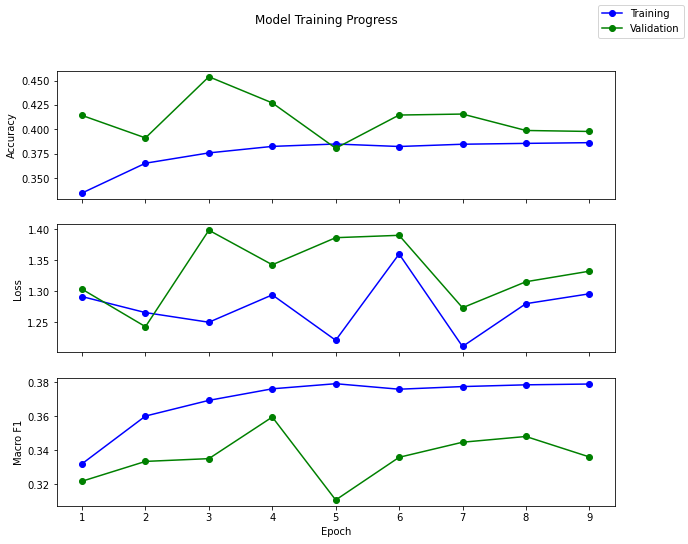

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 180/180 [04:54<00:00,  1.64s/it]

                precision    recall  f1-score   support

      fix-bugs       0.20      0.16      0.18        32
  new-features       0.20      0.16      0.18        49
 documentation       0.08      0.88      0.15         8
non-functional       0.25      0.08      0.12        91

      accuracy                           0.15       180
     macro avg       0.18      0.32      0.16       180
  weighted avg       0.22      0.15      0.15       180

[[ 5  2 13 12]
 [ 4  8 28  9]
 [ 1  0  7  0]
 [15 30 39  7]]


In [4]:
evaluate("jeniya/BERTOverflow", f'{root}/data/big_data/BOF_model_40k_balanced_1e-03_solid.pt')

### BERTOverflow finetuned on 40k unbalanced dataset, solid

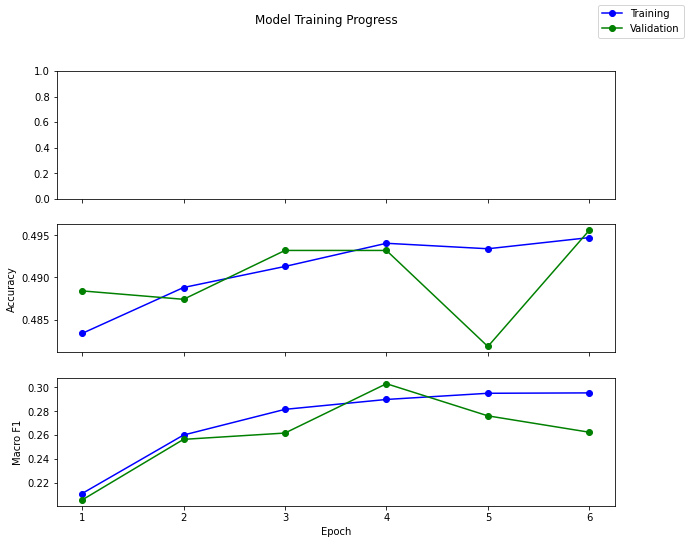

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 180/180 [04:22<00:00,  1.46s/it]

                precision    recall  f1-score   support

      fix-bugs       0.19      1.00      0.32        32
  new-features       0.00      0.00      0.00        49
 documentation       0.00      0.00      0.00         8
non-functional       0.25      0.02      0.04        91

      accuracy                           0.19       180
     macro avg       0.11      0.26      0.09       180
  weighted avg       0.16      0.19      0.08       180

[[32  0  0  0]
 [45  0  0  4]
 [ 6  0  0  2]
 [87  2  0  2]]



/Users/shabo/Documents/Backtick/exjobb/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shabo/Documents/Backtick/exjobb/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shabo/Documents/Backtick/exjobb/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

In [8]:
evaluate("jeniya/BERTOverflow", f'{root}/data/big_data/BOF_model_40k_unbalanced_1e-03_solid.pt')

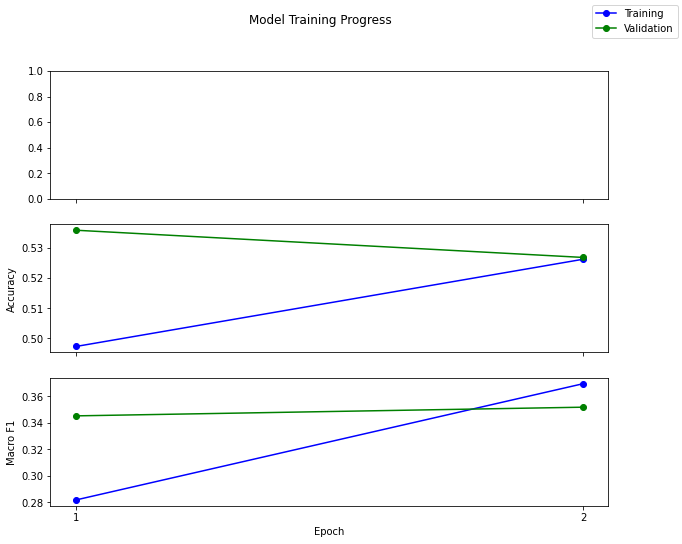

100%|███████████████████████████████████████████████████████████████████| 180/180 [05:29<00:00,  1.83s/it]

                precision    recall  f1-score   support

      fix-bugs       0.24      1.00      0.39        32
  new-features       1.00      0.02      0.04        49
 documentation       0.67      0.25      0.36         8
non-functional       0.86      0.41      0.55        91

      accuracy                           0.40       180
     macro avg       0.69      0.42      0.34       180
  weighted avg       0.78      0.40      0.38       180

[[32  0  0  0]
 [42  1  0  6]
 [ 6  0  2  0]
 [53  0  1 37]]


In [13]:
evaluate("microsoft/codebert-base", f'{root}/data/big_data/codebert-base_model_40k_unbalanced_1e-03_solid.pt')

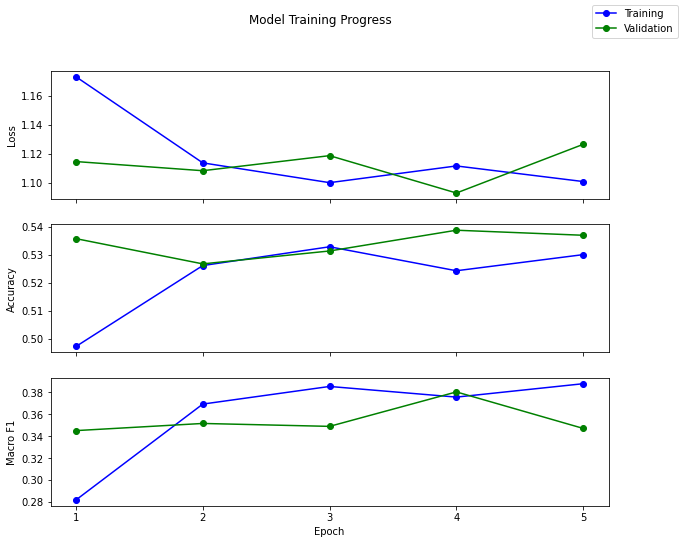

100%|███████████████████████████████████████████████████████████████████| 180/180 [04:58<00:00,  1.66s/it]

                precision    recall  f1-score   support

      fix-bugs       0.25      1.00      0.40        32
  new-features       1.00      0.02      0.04        49
 documentation       1.00      0.12      0.22         8
non-functional       0.84      0.45      0.59        91

      accuracy                           0.42       180
     macro avg       0.77      0.40      0.31       180
  weighted avg       0.78      0.42      0.39       180

[[32  0  0  0]
 [42  1  0  6]
 [ 5  0  1  2]
 [50  0  0 41]]


In [6]:
evaluate("microsoft/codebert-base", f'{root}/data/big_data/codebert-base_model_40k_unbalanced_1e-03_solid.pt')